In [2]:
!pwd
%cd ..

/home/ubuntu/capstone/training_baseline/notebooks
/home/ubuntu/capstone/training_baseline


In [3]:
import timm
import torch

from pytorch_lightning import Callback, LightningDataModule, LightningModule, Trainer

from src.models.timm_module import LitModule
from src.datamodules.intelimage_datamodule import IntelImgClfDataModule

In [4]:
class MyModel(LitModule):
    def __init__(
        self,
        model_name: str,
        learning_rate: float,
        num_classes: int = 10,
    ):
        net = timm.create_model(model_name, num_classes=num_classes, pretrained=True)
        super().__init__(net, None, None)
        self.lr = learning_rate
        
    def configure_optimizers(self) -> dict:
        optimizer = torch.optim.Adam(self.parameters(), self.lr)
        return {"optimizer": optimizer}

In [5]:
model = MyModel("resnet50d", 0.01, 6)

/opt/conda/envs/pytorch/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.
  rank_zero_warn(


In [15]:
datamodule = IntelImgClfDataModule(root_data_dir="data", batch_size=32, num_workers=8, pin_memory=False)
datamodule.prepare_data()
datamodule.setup()

:: Skipping dataset exists


# ResNet50

In [18]:
trainer = Trainer(auto_lr_find=True, max_epochs=5, accelerator='gpu')
lr_finder = trainer.tuner.lr_find(model, datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: /home/ubuntu/capstone/training_baseline/lightning_logs


:: Skipping dataset exists


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Restoring states from the checkpoint path at /home/ubuntu/capstone/training_baseline/.lr_find_b640411c-6196-4421-a995-d31830e5bed1.ckpt
Restored all states from the checkpoint file at /home/ubuntu/capstone/training_baseline/.lr_find_b640411c-6196-4421-a995-d31830e5bed1.ckpt


In [19]:
lr_finder.results

{'lr': [1e-08,
  1.4454397707459274e-08,
  1.7378008287493753e-08,
  2.0892961308540398e-08,
  2.51188643150958e-08,
  3.019951720402016e-08,
  3.630780547701014e-08,
  4.36515832240166e-08,
  5.248074602497726e-08,
  6.309573444801934e-08,
  7.585775750291837e-08,
  9.120108393559096e-08,
  1.0964781961431852e-07,
  1.3182567385564074e-07,
  1.5848931924611133e-07,
  1.9054607179632475e-07,
  2.2908676527677735e-07,
  2.7542287033381663e-07,
  3.311311214825911e-07,
  3.9810717055349735e-07,
  4.786300923226383e-07,
  5.75439937337157e-07,
  6.918309709189366e-07,
  8.317637711026709e-07,
  1e-06,
  1.2022644346174132e-06,
  1.445439770745928e-06,
  1.7378008287493761e-06,
  2.089296130854039e-06,
  2.5118864315095797e-06,
  3.0199517204020163e-06,
  3.630780547701014e-06,
  4.365158322401661e-06,
  5.248074602497728e-06,
  6.3095734448019305e-06,
  7.585775750291836e-06,
  9.120108393559096e-06,
  1.0964781961431852e-05,
  1.3182567385564076e-05,
  1.584893192461114e-05,
  1.90546071

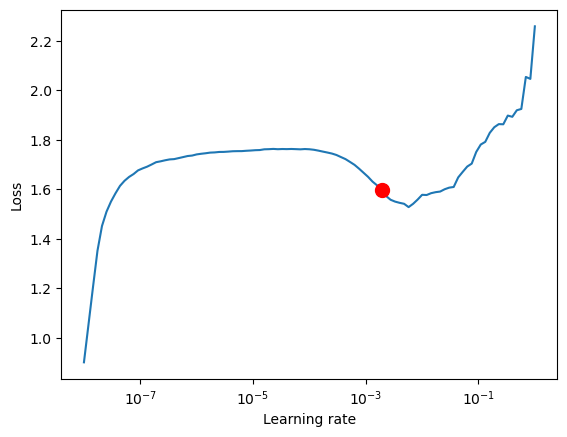

In [20]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [21]:
lr_finder.suggestion()

0.0019054607179632484

# efficientnet_b3

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: /home/ubuntu/capstone/training_baseline/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


:: Skipping dataset exists


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=97` reached.
LR finder stopped early after 97 steps due to diverging loss.
Restoring states from the checkpoint path at /home/ubuntu/capstone/training_baseline/.lr_find_f049370f-99bd-4346-8840-857aa276802a.ckpt
Restored all states from the checkpoint file at /home/ubuntu/capstone/training_baseline/.lr_find_f049370f-99bd-4346-8840-857aa276802a.ckpt


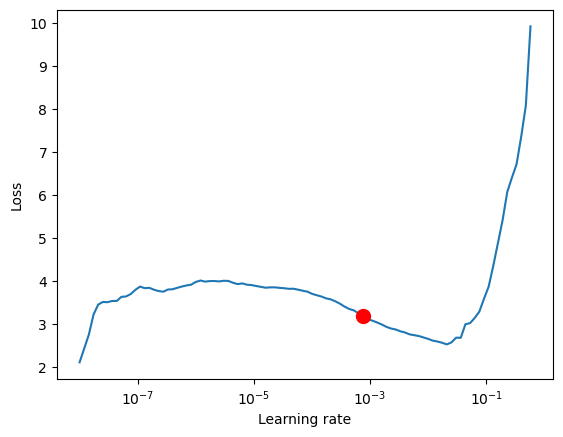

In [22]:
model = MyModel("efficientnet_b3", 0.01, 6)
trainer = Trainer(auto_lr_find=True, max_epochs=5, accelerator='gpu')
lr_finder = trainer.tuner.lr_find(model, datamodule)

fig = lr_finder.plot(suggest=True)
fig.show()

In [23]:
lr_finder.suggestion()

0.0007585775750291836

lr range for hpyer param tuning  0.0001 < lr < 0.001